## kerasでCNNを試してみよう

In [20]:
from __future__ import print_function
import numpy as np
np.random.seed(20170214)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras import backend as K
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

%matplotlib inline

In [21]:
batch_size = 128
nb_classes = 10
#number of learning epoch
nb_epoch = 5

In [22]:
# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

In [31]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [24]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [25]:
model = Sequential()

model.add(Conv2D(nb_filters, (kernel_size[0], kernel_size[1]),
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, (kernel_size[0], kernel_size[1])))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
  """
/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys


In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [29]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 113s 2ms/step - loss: 0.1608 - acc: 0.9516 - val_loss: 0.0588 - val_acc: 0.9819
Epoch 2/5
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0899 - acc: 0.9733 - val_loss: 0.0409 - val_acc: 0.9859
Epoch 3/5
39680/60000 [==================>...........] - ETA: 34s - loss: 0.0686 - acc: 0.9795

KeyboardInterrupt: 

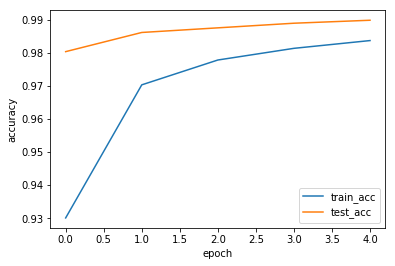

In [13]:
plt.plot(history.history['acc'], label='train_acc')
plt.plot(history.history['val_acc'], label='test_acc')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.clf()

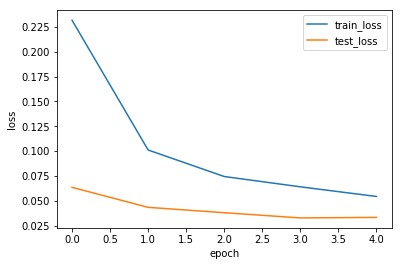

In [14]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.clf()

In [15]:
pred = model.predict(X_test)
pred_result = []
for i in pred:
    pred_result.append(i.argmax())

In [16]:
def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    plt.figure(figsize = (10,7))
    sn.heatmap(df_cmx, annot=True, cmap='Greens')
    plt.show()

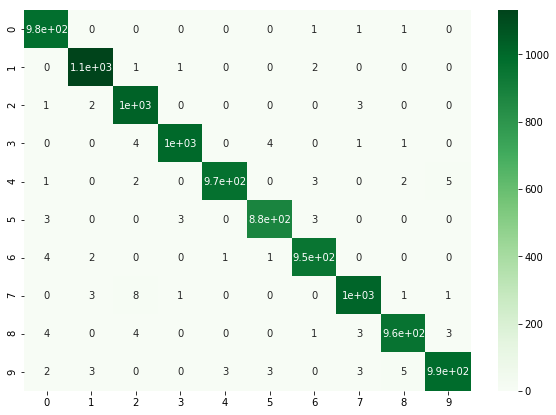

In [17]:
print_cmx(y_test, pred_result)